In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, svm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt

from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


import statsmodels.api as sm

from IPython.display import display
import pickle

In [29]:
df_1 = pd.read_csv("../data/kappa_distance_2021.csv")
data = df_1.copy(deep=True)

In [30]:
data.head()

,Unnamed: 0,timestamp,kappa,distance
0,0,2021-01-01 00:02:24,4.747468,1.772268
1,1,2021-01-02 00:02:24,10.500496,1.998574
2,2,2021-01-03 00:02:24,11.024607,1.892996
3,3,2021-01-04 00:02:24,14.888399,1.946318
4,4,2021-01-05 00:02:24,17.697876,1.977037


In [31]:
data.drop(columns="Unnamed: 0", inplace=True)

In [32]:
# timestampを変換する
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [33]:
data.shape

(364, 3)

In [34]:
X = data.distance.values.reshape(-1, 1)
y = data.kappa.values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [48]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# モデルの評価指標
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=1234)
kfold = KFold(n_splits=3, shuffle=True, random_state=1234)

scores = cross_val_score(rf, X_train, y_train, cv=kfold)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.48735729 0.43062513 0.57433763]
Average score: 0.4974400179386442


In [40]:
# ハイパーパラメータのチューニング
params = {
    "n_estimators":[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096],
    "max_depth":[8, 16, 32, 64, 128, 256, 512],
    "max_leaf_nodes":[5, 10, 15, 20, 25, 30],
    "n_jobs":[-1]
}

In [41]:
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    verbose=2
)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 462 candidates, totalling 2310 fits
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=16, n_jobs=-1; total ti

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 16, 32, 64, 128, 256, 512],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                          2048, 4096],
                         'n_jobs': [-1]},
             verbose=2)

In [42]:
with open("../data/model/kappa_distance_2021_RandomForest.pkl", "wb") as f:
    pickle.dump(cv, f, protocol=4)

In [49]:
print("Test set score: {:.2f}".format(cv.score(X_test, y_test)))

Test set score: 0.57


In [51]:
results = pd.DataFrame(cv.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014048,0.001226,0.014043,0.000182,8,5,4,-1,"{'max_depth': 8, 'max_leaf_nodes': 5, 'n_estim...",0.710963,0.511819,0.566721,0.592245,0.649910,0.606331,0.068625,141
1,0.015588,0.000312,0.013839,0.000838,8,5,8,-1,"{'max_depth': 8, 'max_leaf_nodes': 5, 'n_estim...",0.694122,0.561943,0.581846,0.592470,0.682555,0.622587,0.054695,68
2,0.015514,0.001094,0.013830,0.000298,8,5,16,-1,"{'max_depth': 8, 'max_leaf_nodes': 5, 'n_estim...",0.727857,0.527608,0.575498,0.611305,0.701331,0.628720,0.075445,39
3,0.016622,0.001168,0.013065,0.000615,8,5,32,-1,"{'max_depth': 8, 'max_leaf_nodes': 5, 'n_estim...",0.728074,0.542169,0.581267,0.624548,0.702484,0.635708,0.070468,1
4,0.034541,0.001231,0.013894,0.000067,8,5,64,-1,"{'max_depth': 8, 'max_leaf_nodes': 5, 'n_estim...",0.716067,0.539376,0.580840,0.608431,0.697325,0.628408,0.067856,43


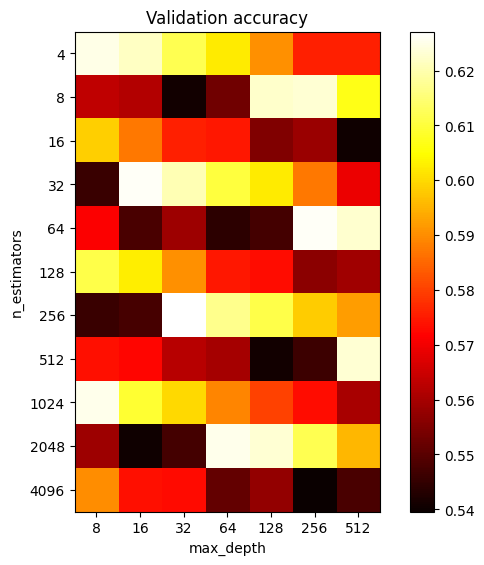

In [53]:
scores = np.array(results.mean_test_score).reshape(11, 7, 6)

# heatmapを作成
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores.mean(axis=2), interpolation="nearest", cmap=plt.cm.hot)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.colorbar()
plt.xticks(np.arange(7), params["max_depth"])
plt.yticks(np.arange(11), params["n_estimators"])
plt.title("Validation accuracy")
plt.show()

### Ridge Regression


In [17]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"training dataに対しての精度: {ridge.score(X_train, y_train):.2}")
print(f"test set scoreに対しての精度: {ridge.score(X_test, y_test):.2f}")

training dataに対しての精度: 0.63
test set scoreに対しての精度: 0.58


In [18]:
y_pred = ridge.predict(X_test)
print("MSE", mean_squared_error(y_test, y_pred))

MSE 273.7263555675119


In [24]:
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.5820204935002714


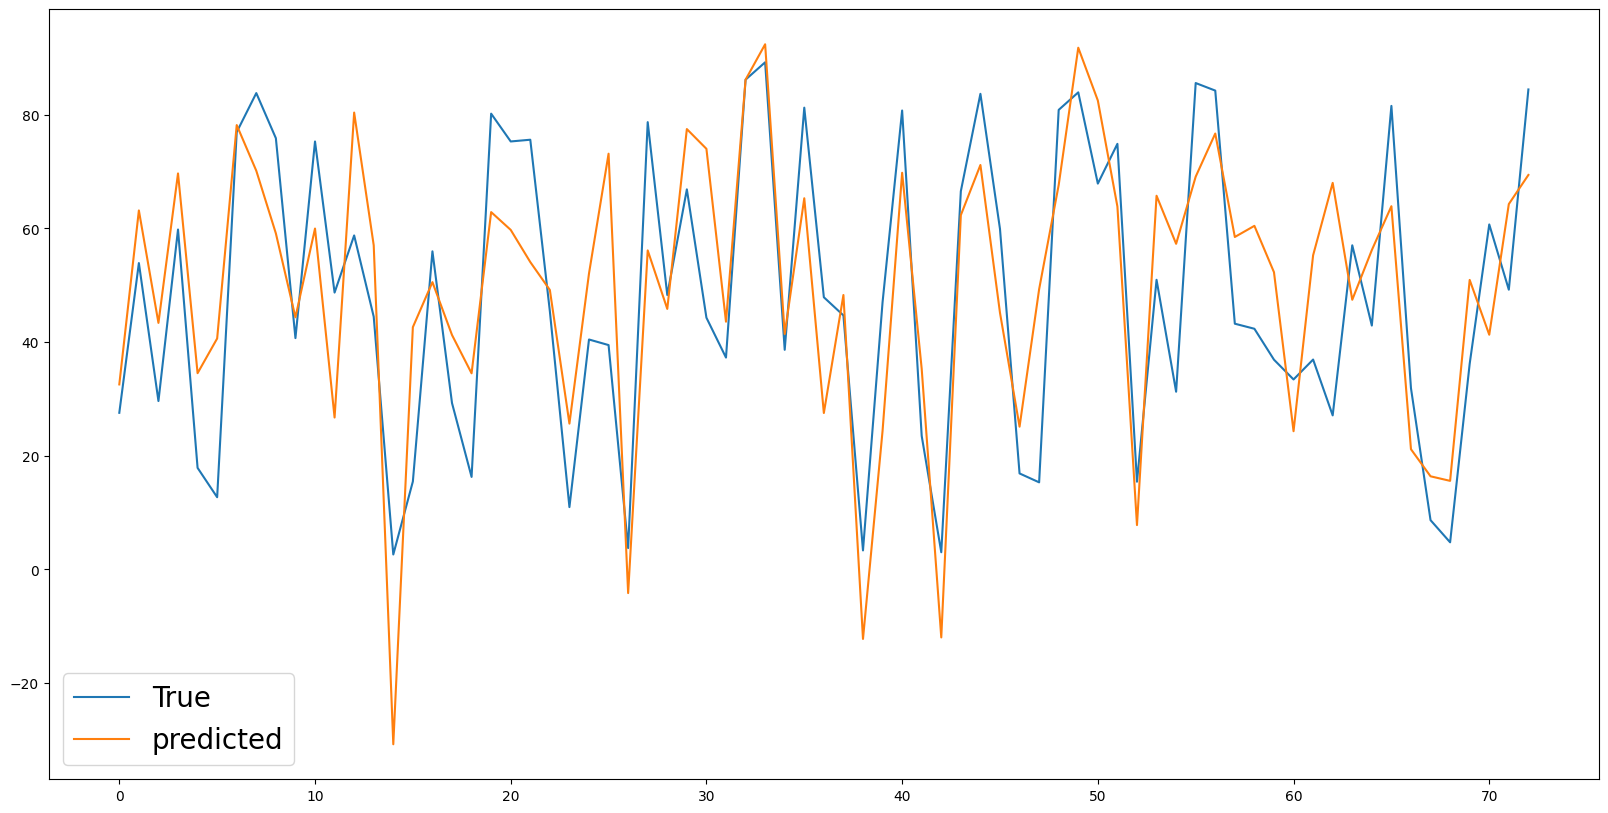

In [22]:
# plot
plt.figure(figsize=(20, 10))
plt.plot(y_test, label="True")
plt.plot(y_pred, label="predicted")
plt.legend(prop={"size": 20})
plt.show()


### ElasticNet

In [24]:
df_2 = pd.read_csv("../data/kappa_distance_2022_2023.csv")

In [25]:
data_2 = df_2.copy(deep=True)

data_2.head()

,Unnamed: 0,timestamp,kappa,distance
0,0,2022-01-01 00:00:05,27.591274,1.872685
1,1,2022-01-02 00:00:05,24.092994,1.700836
2,2,2022-01-03 00:00:05,38.763201,1.685314
3,3,2022-01-04 00:00:05,55.144933,1.768618
4,4,2022-01-05 00:00:05,34.098828,1.597567


In [26]:
data_2.drop(columns="Unnamed: 0", inplace=True)

# timestampを変換する
data_2["timestamp"] = pd.to_datetime(data_2["timestamp"])

In [30]:
X = data_2.distance.values.reshape(-1, 1)
y = data_2.kappa.values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# ハイパーパラメータのチューニング
params = {
    "n_estimators":[4, 8, 16, 32, 64, 128, 256, 512, 1024],
    "max_depth":[8, 16, 32, 64, 128, 256, 512, 1024],
    "max_leaf_nodes":[5, 10, 15, 20, 25, 30, 35, 40],
    "n_jobs":[-1]
}

cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    verbose=2
)

cv.fit(X_train, y_train)

forest = cv.best_estimator_
preds = forest.predict(X_test)
print("精度検証", mean_squared_error(y_test, preds))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=16, n_jobs=-1; total ti

In [36]:
with open("../data/model/forest_2022_2023.pkl", "wb") as f:
    pickle.dump(forest, f, protocol=4)

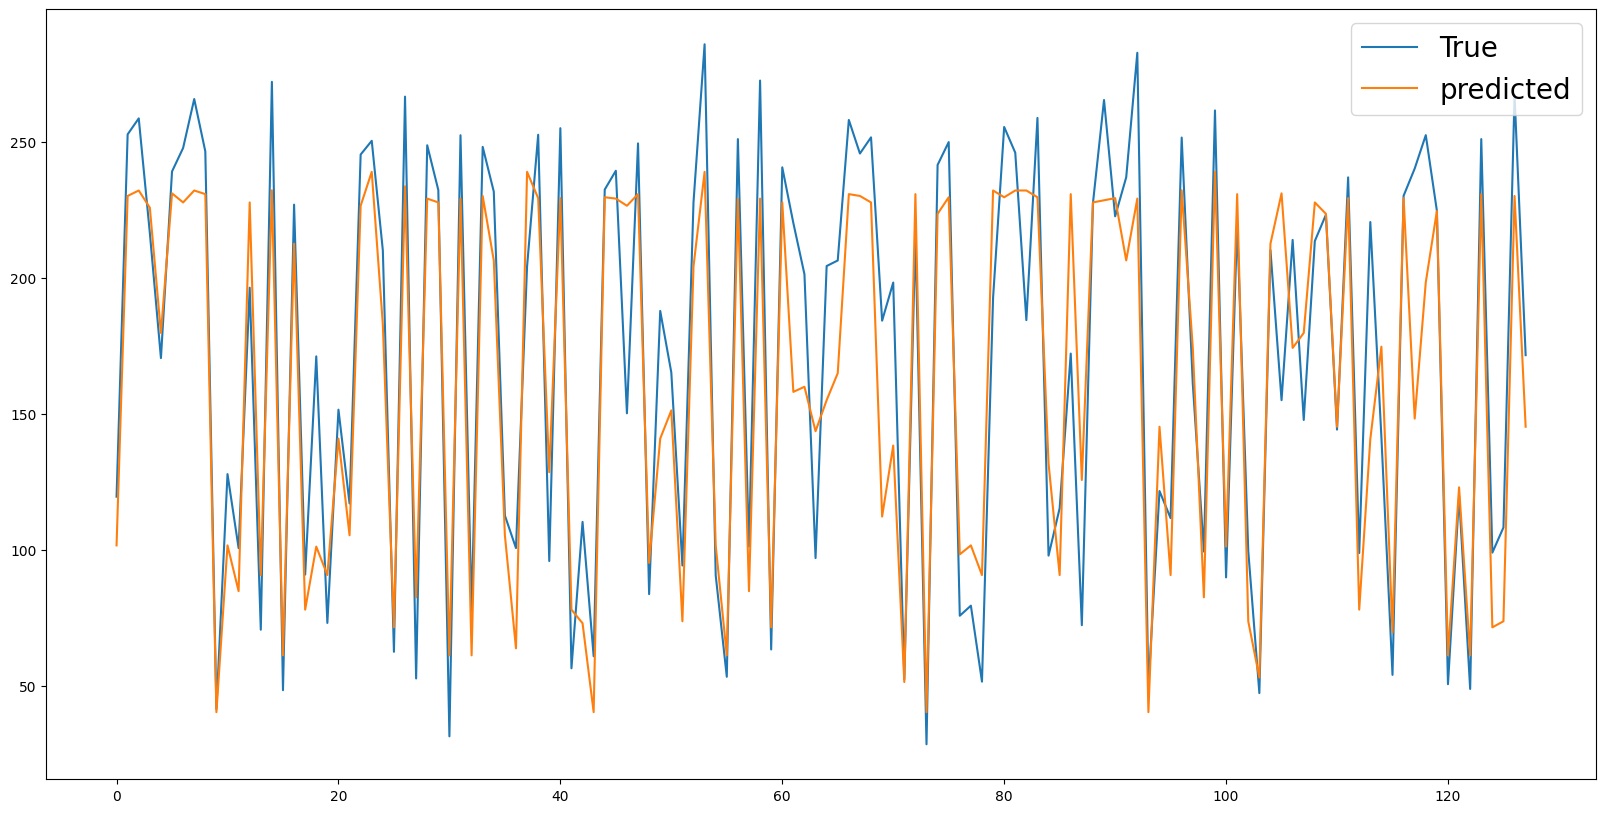

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label="True")
plt.plot(preds, label="predicted")
plt.legend(prop={"size": 20})
plt.show()

In [33]:
print("r2_score", r2_score(y_test, preds))

r2_score 0.8367620913238306
